In [2]:
import tensorflow as tf

In [24]:
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential

In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mnist_dataset = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [29]:
print("training data size", len(x_train))
print("testing data size", len(x_test))
x_train.shape

training data size 60000
testing data size 10000


(60000, 28, 28)

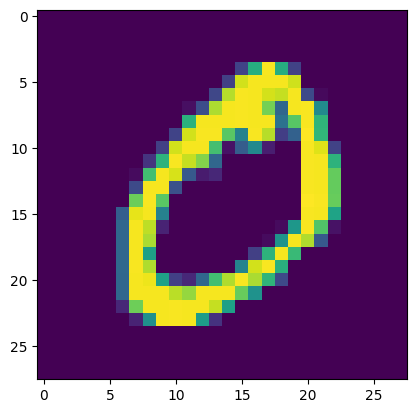

In [13]:
plt.imshow(x_train[1])

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [48]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2608 - accuracy: 0.9265 - val_loss: 0.1346 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9660 - val_loss: 0.0958 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0783 - accuracy: 0.9768 - val_loss: 0.0838 - val_accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0590 - accuracy: 0.9825 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9895 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9910 - val_loss: 0.0826 - val_accuracy:

In [35]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9788
Loss=0.080
Accuracy=0.979


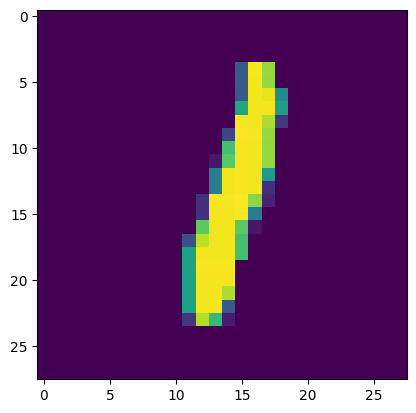

predicted value is: 1


In [41]:
n = 455
plt.imshow(x_test[n])
plt.show()
predicted_values = model.predict(x_test)
print("predicted value is:", np.argmax(predicted_values[n]))

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [44]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5029184671240185888
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1304434688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6988046638302868453
physical_device_desc: "device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
